##Pridicting CO2 Emmisions Using Regression

In [ ]:
#Import important libaries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
#import the csv data file from to your google colab noteboke from your computer
from google.colab import files
Updated=files.upload()

Saving Fuel.csv to Fuel.csv


In [ ]:
df=pd.read_csv('Fuel.csv', sep=',')
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
missing_data=df.isnull()
missing_data.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


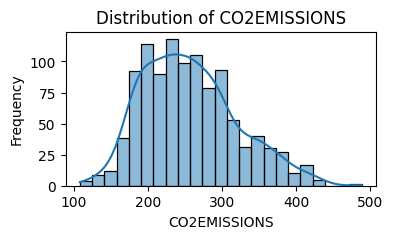

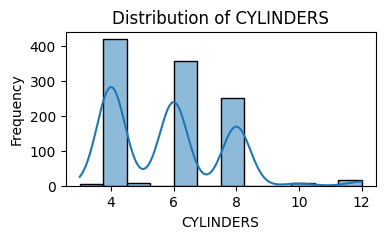

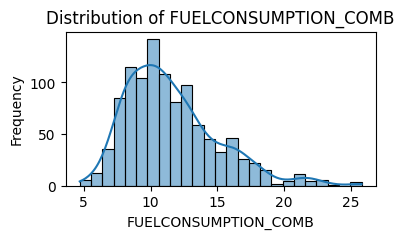

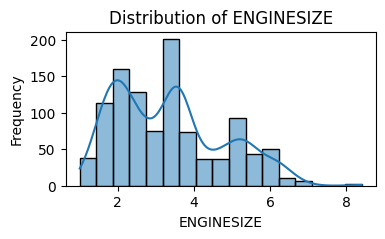

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['CO2EMISSIONS', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'ENGINESIZE']

for col in columns_to_plot:
    plt.figure(figsize=(4, 2)) # Create a new figure for each plot
    sns.histplot(data=cdf, x=col, kde=True) # Use histplot with the column name
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='FUELCONSUMPTION_COMB', ylabel='CO2EMISSIONS'>

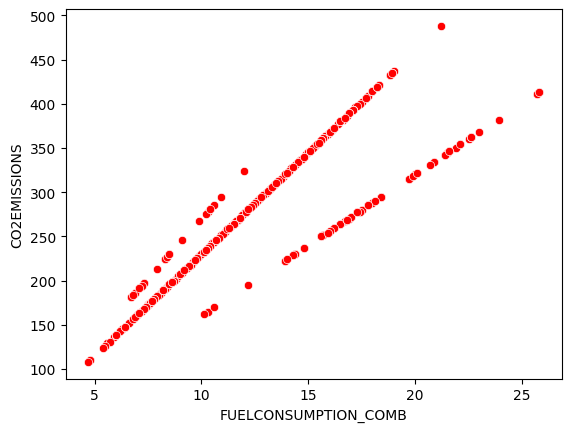

In [ ]:
sns.scatterplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', color='red', data=cdf)

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

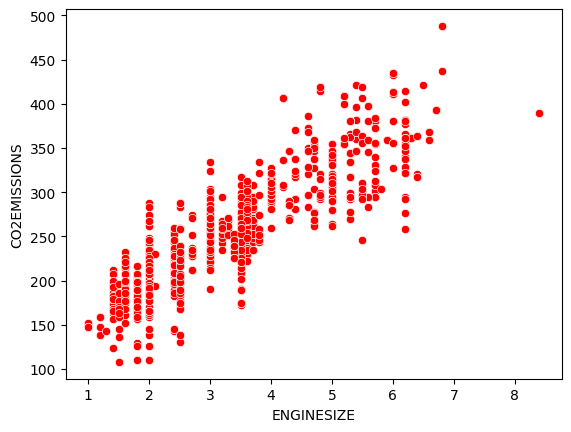

In [ ]:
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', color='red', data=cdf)

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

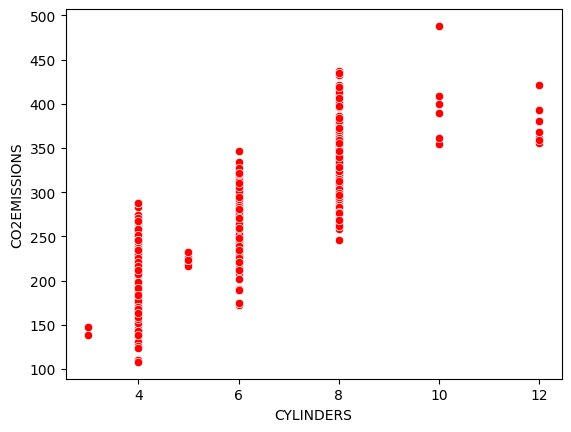

In [ ]:
sns.scatterplot(x='CYLINDERS', y='CO2EMISSIONS', color='red', data=cdf)

##Model Training

In [ ]:
#install specific version of libraries used in lab
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression #loading modules for linear regression
model= LinearRegression() #creating a linear regression model
model

LinearRegression()

###Model Evaluation and Training

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(cdf[['ENGINESIZE']], cdf['CO2EMISSIONS'], test_size=0.2, random_state=42)

# Train the model using the training data
model.fit(x_train, y_train)

print("Model training complete.")
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Model training complete.
Coefficients:  [38.99297872]
Intercept:  126.28970217408721


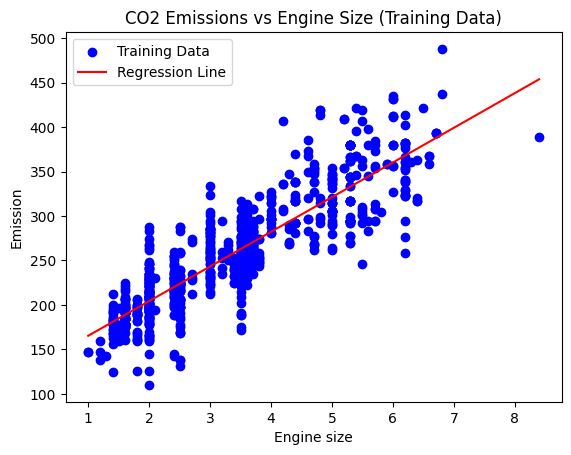

In [ ]:
# Assuming x_train is a DataFrame and y_train is a Series
plt.scatter(x_train['ENGINESIZE'], y_train,  color='blue', label='Training Data')

# Plot the linear regression line
# Create a range of values for engine size to plot the line
line_x = np.linspace(x_train['ENGINESIZE'].min(), x_train['ENGINESIZE'].max(), 100)
line_y = model.coef_[0] * line_x + model.intercept_
plt.plot(line_x, line_y, '-r', label='Regression Line')

plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("CO2 Emissions vs Engine Size (Training Data)")
plt.legend()
plt.show()

###Model Prediction

In [ ]:
# Make predictions using the trained model
yhat = model.predict(x_test)

print(yhat)

[309.55670218 262.76512771 266.66442558 243.26863835 204.27565962
 243.26863835 266.66442558 282.26161707 321.2545958  266.66442558
 266.66442558 387.54265963 251.06723409 262.76512771 266.66442558
 262.76512771 188.67846813 266.66442558 188.67846813 332.95248941
 321.2545958  196.47706388 251.06723409 270.56372345 243.26863835
 196.47706388 204.27565962 188.67846813 340.75108516 251.06723409
 336.85178729 219.87285111 196.47706388 321.2545958  243.26863835
 309.55670218 282.26161707 332.95248941 204.27565962 223.77214899
 188.67846813 188.67846813 180.87987239 223.77214899 282.26161707
 188.67846813 243.26863835 243.26863835 204.27565962 329.05319154
 368.04617027 266.66442558 204.27565962 270.56372345 243.26863835
 332.95248941 332.95248941 348.5496809  204.27565962 293.95951069
 282.26161707 293.95951069 297.85880856 266.66442558 188.67846813
 258.86582984 180.87987239 313.45600005 243.26863835 270.56372345
 321.2545958  204.27565962 262.76512771 204.27565962 204.27565962
 266.66442

###Model Evalution

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, yhat)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 24.10
Mean Squared Error (MSE): 985.94
Root Mean Squared Error (RMSE): 31.40
R-squared (R²): 0.76


##Multiple Linear Regression

###Model Evaluation and Training

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']], cdf['CO2EMISSIONS'], test_size=0.2, random_state=42)

# Train the model using the training data
model.fit(x_train, y_train)

print("Model training complete.")
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Model training complete.
Coefficients:  [11.2094395   7.15561381  9.5208118 ]
Intercept:  67.3483851836209


###Model Prediction

In [ ]:
# Make predictions using the trained model
yhat = model.predict(x_test)

print(yhat)

[302.95237705 240.91489956 272.50244127 235.31017981 204.07702562
 245.78307279 304.87320139 283.65078533 309.17145244 307.72944493
 287.73574015 391.1248773  252.78536659 251.38779254 262.02954829
 255.19611726 210.0661428  250.60457413 190.07243802 307.77387839
 318.69226424 205.64346244 256.59369131 248.86927454 261.96845285
 197.07473182 205.0291068  186.2641133  309.06368511 248.97704187
 390.77380382 203.80039551 205.64346244 327.26099486 238.16642335
 286.76699699 277.01622698 399.17367168 199.31661972 204.92133946
 176.7433015  187.21619448 186.87846894 209.68174536 279.84246061
 199.59324982 244.83099161 259.11220931 192.65205146 362.85573398
 315.0061304  278.21492835 211.69367506 267.91089814 264.82469639
 315.39052783 388.70077869 322.73054717 191.69997028 278.44488656
 301.77033767 270.82823712 290.0687334  254.41289885 192.92868156
 246.45852387 185.92638776 300.26499628 254.35180341 263.15049224
 347.25469964 196.46037618 259.00444198 207.88535034 213.59783742
 291.54406

###Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, yhat)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 16.72
Mean Squared Error (MSE): 512.86
Root Mean Squared Error (RMSE): 22.65
R-squared (R²): 0.88


##Polinomial Regression

###Model Evaluation and Training

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(cdf[['ENGINESIZE']], cdf['CO2EMISSIONS'], test_size=0.2, random_state=42)

# Create polynomial features
# You can adjust the 'degree' parameter to control the degree of the polynomial
poly = PolynomialFeatures(degree=2) # Example: degree 2 for a quadratic relationship
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Train a Linear Regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

print("Polynomial Regression Model training complete.")
# The coefficients
print ('Coefficients: ', poly_model.coef_)
print ('Intercept: ',poly_model.intercept_)

Polynomial Regression Model training complete.
Coefficients:  [ 0.         47.42976379 -1.12705382]
Intercept:  112.92021963451734


###Prediction

In [ ]:
# Make predictions using the trained model
yhat = poly_model.predict(x_test_poly)

print(yhat)

[310.94349053 265.11798359 269.06075175 245.06602661 203.27153193
 245.06602661 269.06075175 284.60641365 321.89269305 269.06075175
 269.06075175 380.10619098 253.15443263 265.11798359 269.06075175
 265.11798359 185.92258392 269.06075175 185.92258392 332.63902588
 321.89269305 194.64214008 253.15443263 272.98097884 245.06602661
 194.64214008 203.27153193 185.92258392 339.69054238 253.15443263
 336.17605467 220.25982272 194.64214008 321.89269305 245.06602661
 310.94349053 284.60641365 332.63902588 203.27153193 224.45054273
 185.92258392 185.92258392 177.11286345 224.45054273 284.60641365
 185.92258392 245.06602661 245.06602661 203.27153193 329.07945601
 363.66080623 269.06075175 203.27153193 272.98097884 245.06602661
 332.63902588 332.63902588 346.65189458 203.27153193 296.02897877
 284.60641365 296.02897877 299.79141833 269.06075175 185.92258392
 261.15267435 177.11286345 314.61576578 245.06602661 272.98097884
 321.89269305 203.27153193 265.11798359 203.27153193 203.27153193
 269.06075

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


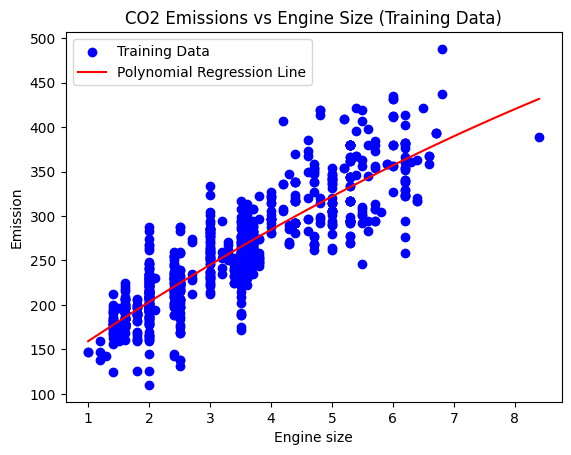

In [ ]:
# Assuming x_train is a DataFrame and y_train is a Series
plt.scatter(x_train['ENGINESIZE'], y_train,  color='blue', label='Training Data')

# Plot the polynomial regression line
# Create a range of values for engine size to plot the line
line_x = np.linspace(x_train['ENGINESIZE'].min(), x_train['ENGINESIZE'].max(), 100).reshape(-1, 1) # Reshape for polynomial transformation
line_x_poly = poly.transform(line_x) # Transform into polynomial features

# Calculate the predicted y values using the polynomial model
line_y = poly_model.predict(line_x_poly)

plt.plot(line_x, line_y, '-r', label='Polynomial Regression Line')

plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("CO2 Emissions vs Engine Size (Training Data)")
plt.legend()
plt.show()

##Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test contains the actual values and yhat_poly contains the predictions from the polynomial model

# Calculate evaluation metrics for the polynomial regression model
mae_poly = mean_absolute_error(y_test, yhat_poly)
mse_poly = mean_squared_error(y_test, yhat_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, yhat_poly)

print(f"Polynomial Model - Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"Polynomial Model - Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Polynomial Model - Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"Polynomial Model - R-squared (R²): {r2_poly:.2f}")

Polynomial Model - Mean Absolute Error (MAE): 23.92
Polynomial Model - Mean Squared Error (MSE): 960.87
Polynomial Model - Root Mean Squared Error (RMSE): 31.00
Polynomial Model - R-squared (R²): 0.77
